In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
DATA_FOLDER = 'data'
RESULTS_FOLDER = 'write'

results_file = f'{RESULTS_FOLDER}/gse75688.h5ad'

# Reading Dataset

In [3]:
df_info = pd.read_csv(f'{DATA_FOLDER}/GSE75688_final_sample_information.txt.gz', sep='\t')
df_info = df_info.rename(columns={'index': 'is_tumor'})
df_info

,sample,type,is_tumor,index2,index3
0,BC01_02,SC,Tumor,Tumor,Tumor
1,BC01_03,SC,Tumor,Tumor,Tumor
2,BC01_04,SC,Tumor,Tumor,Tumor
3,BC01_05,SC,Tumor,Tumor,Tumor
4,BC01_06,SC,Tumor,Tumor,Tumor
...,...,...,...,...,...
523,BC06_58,SC,nonTumor,Immune,Bcell
524,BC06_60,SC,Tumor,Tumor,Tumor
525,BC06_61,SC,nonTumor,Immune,Bcell
526,BC06_74,SC,Tumor,Tumor,Tumor


In [4]:
list(df_info['sample'])

['BC01_02',
 'BC01_03',
 'BC01_04',
 'BC01_05',
 'BC01_06',
 'BC01_08',
 'BC01_10',
 'BC01_12',
 'BC01_33',
 'BC01_34',
 'BC01_50',
 'BC01_53',
 'BC01_55',
 'BC01_57',
 'BC01_66',
 'BC01_69',
 'BC01_70',
 'BC01_72',
 'BC01_74',
 'BC01_77',
 'BC01_87',
 'BC01_95',
 'BC01_Pooled',
 'BC04_01',
 'BC04_02',
 'BC04_07',
 'BC04_08',
 'BC04_09',
 'BC04_11',
 'BC04_13',
 'BC04_14',
 'BC04_16',
 'BC04_20',
 'BC04_21',
 'BC04_22',
 'BC04_23',
 'BC04_24',
 'BC04_27',
 'BC04_28',
 'BC04_29',
 'BC04_30',
 'BC04_31',
 'BC04_32',
 'BC04_33',
 'BC04_35',
 'BC04_36',
 'BC04_37',
 'BC04_39',
 'BC04_40',
 'BC04_41',
 'BC04_45',
 'BC04_49',
 'BC04_53',
 'BC04_54',
 'BC04_56',
 'BC04_58',
 'BC04_59',
 'BC04_60',
 'BC04_61',
 'BC04_62',
 'BC04_63',
 'BC04_64',
 'BC04_66',
 'BC04_69',
 'BC04_71',
 'BC04_72',
 'BC04_77',
 'BC04_78',
 'BC04_82',
 'BC04_85',
 'BC04_86',
 'BC04_88',
 'BC04_89',
 'BC04_90',
 'BC04_91',
 'BC04_92',
 'BC04_93',
 'BC04_96',
 'BC04_Pooled',
 'BC07_01',
 'BC07_03',
 'BC07_04',
 'BC07_0

In [5]:
df_info['is_tumor'].value_counts()

Tumor       326
nonTumor    202
Name: is_tumor, dtype: int64

In [6]:
df = pd.read_csv(f'{DATA_FOLDER}/GSE75688_GEO_processed_Breast_Cancer_raw_TPM_matrix.txt.gz', sep='\t')
df

,gene_id,gene_name,gene_type,BC01_Pooled,BC01_Tumor,BC02_Pooled,BC03_Pooled,BC03LN_Pooled,BC04_Pooled,BC05_Pooled,...,BC11_04,BC11_07,BC11_28,BC11_43,BC11_56,BC11_69,BC11_70,BC11_78,BC11_81,BC11_88
0,ENSG00000000003.10,TSPAN6,protein_coding,2.33,1.25,43.96,7.64,9.32,133.37,84.77,...,0.00,47.44,16.11,0.00,6.56,0.00,0.00,0.00,200.82,0.00
1,ENSG00000000005.5,TNMD,protein_coding,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,ENSG00000000419.8,DPM1,protein_coding,60.70,28.44,74.73,41.41,87.69,120.41,70.67,...,198.96,0.00,0.00,20.63,0.00,0.00,0.00,136.07,22.03,204.58
3,ENSG00000000457.9,SCYL3,protein_coding,47.93,4.43,9.89,7.61,7.32,12.42,12.02,...,0.00,10.96,0.00,0.00,0.00,0.27,0.00,0.07,0.19,9.52
4,ENSG00000000460.12,C1orf112,protein_coding,4.79,1.67,10.87,0.92,15.13,17.10,5.69,...,0.00,6.97,9.02,0.00,0.00,0.14,247.69,22.60,11.35,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57910,ERCC-00170,ERCC-00170,ERCC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57911,ERCC-00171,ERCC-00171,ERCC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57912,SPIKE1,EC2,SPIKE_IN,14940.70,45728.19,10442.91,94250.71,40823.13,24540.58,12613.85,...,166346.51,54443.35,120842.89,135291.06,138048.60,58840.26,65246.34,33465.11,108901.35,57492.01
57913,SPIKE2,EC15,SPIKE_IN,985.82,607.50,362.55,2949.35,1291.13,854.53,399.57,...,6860.84,2136.69,4048.09,4062.59,4147.05,2286.91,2821.49,1652.19,3439.53,1837.41


In [7]:
list(df.columns)

['gene_id',
 'gene_name',
 'gene_type',
 'BC01_Pooled',
 'BC01_Tumor',
 'BC02_Pooled',
 'BC03_Pooled',
 'BC03LN_Pooled',
 'BC04_Pooled',
 'BC05_Pooled',
 'BC06_Pooled',
 'BC07_Tumor',
 'BC07LN_Pooled',
 'BC08_Pooled',
 'BC09_Pooled',
 'BC10_Pooled',
 'BC11_Pooled',
 'BC01_02',
 'BC01_03',
 'BC01_04',
 'BC01_05',
 'BC01_06',
 'BC01_08',
 'BC01_10',
 'BC01_11',
 'BC01_12',
 'BC01_24',
 'BC01_33',
 'BC01_34',
 'BC01_49',
 'BC01_50',
 'BC01_53',
 'BC01_54',
 'BC01_55',
 'BC01_57',
 'BC01_66',
 'BC01_69',
 'BC01_70',
 'BC01_72',
 'BC01_74',
 'BC01_77',
 'BC01_87',
 'BC01_95',
 'BC02_02',
 'BC02_08',
 'BC02_09',
 'BC02_10',
 'BC02_11',
 'BC02_12',
 'BC02_13',
 'BC02_14',
 'BC02_15',
 'BC02_18',
 'BC02_19',
 'BC02_22',
 'BC02_24',
 'BC02_25',
 'BC02_26',
 'BC02_27',
 'BC02_28',
 'BC02_31',
 'BC02_33',
 'BC02_34',
 'BC02_44',
 'BC02_47',
 'BC02_50',
 'BC02_51',
 'BC02_53',
 'BC02_54',
 'BC02_55',
 'BC02_58',
 'BC02_59',
 'BC02_60',
 'BC02_61',
 'BC02_62',
 'BC02_63',
 'BC02_64',
 'BC02_66',
 '

## Creating X and Y

In [8]:
# Selecting columns representing cells
samples = df.loc[:,'BC01_02':]

In [9]:
# Renaming columns with gene names
columns = samples.T.columns.values
gene_name_list = list(df['gene_name'])
columns_mapping = dict(zip(columns, gene_name_list))
samples = samples.T.rename(columns=columns_mapping)

In [10]:
# Merging  features (gene expressions) and labels (index = is_cancer)
labels = df_info.set_index(df_info['sample'])['is_tumor']
samples = samples.merge(labels.to_frame(), left_index=True, right_index=True)
samples

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,EC2,EC15,EC18,is_tumor
BC01_02,0.00,0.0,50.73,3.28,0.00,0.0,0.00,9.64,2.87,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,18414.34,537.11,0.0,Tumor
BC01_03,0.00,0.0,120.46,0.81,13.42,0.0,0.00,36.36,5.02,1.08,...,0.0,0.0,0.0,0.0,0.0,0.0,19603.44,653.27,0.0,Tumor
BC01_04,0.00,0.0,6.97,92.23,0.34,0.0,0.00,0.00,108.11,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,28523.94,916.42,0.0,Tumor
BC01_05,0.00,0.0,180.85,6.44,0.26,0.0,0.00,0.00,2.32,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,31210.57,961.37,0.0,Tumor
BC01_06,0.00,0.0,32.09,59.78,0.00,0.0,0.33,8.42,52.59,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,48684.49,2052.48,0.0,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC11_69,0.00,0.0,0.00,0.27,0.14,0.0,0.00,7.06,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,58840.26,2286.91,0.0,Tumor
BC11_70,0.00,0.0,0.00,0.00,247.69,0.0,0.81,4.49,0.00,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,65246.34,2821.49,0.0,Tumor
BC11_78,0.00,0.0,136.07,0.07,22.60,0.0,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,33465.11,1652.19,0.0,Tumor
BC11_81,200.82,0.0,22.03,0.19,11.35,0.0,0.00,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,0.0,0.0,108901.35,3439.53,0.0,Tumor


In [11]:
def get_patient_id_for_each_sample(x: pd.DataFrame):
    pattern = r'^BC(\d+)'
    indexes = x.index.values
    return [re.search(pattern, label).group(1) for label in indexes]

In [12]:
def get_cancer_types(patient_ids: list):
    cancer_types = []
    for id in patient_ids:
        if id in ('01', '02'):
            cancer_types.append('ER+')
        elif id in ('03'):
            cancer_types.append('ER+ and HER2+')
        elif id in ('04', '05', '06'):
            cancer_types.append('HER2+')
        else:
            cancer_types.append('TNBC')
    return cancer_types

def count_samples_per_class_by_cancer_type(samples: pd.DataFrame):
    patient_ids = get_patient_id_for_each_sample(samples)
    cancer_types = get_cancer_types(patient_ids)
    return pd.DataFrame({
        'is_tumor': samples['is_tumor'].values,
        'patient_id': patient_ids,
        'cancer_type': cancer_types
    })
    
table1_df = count_samples_per_class_by_cancer_type(samples)
table1_df[['is_tumor', 'cancer_type']].groupby('cancer_type').value_counts()

cancer_type    is_tumor
ER+            Tumor        73
               nonTumor      2
ER+ and HER2+  nonTumor     61
               Tumor        25
HER2+          Tumor       130
               nonTumor     19
TNBC           nonTumor    116
               Tumor        89
dtype: int64

In [13]:
samples['is_tumor'].value_counts()

Tumor       317
nonTumor    198
Name: is_tumor, dtype: int64

In [14]:
x = samples.iloc[:,:-1]
y = samples.is_tumor.replace({'Tumor': 1, 'nonTumor': 0})
patients = get_patient_id_for_each_sample(x)

In [15]:
x

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ERCC-00162,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,EC2,EC15,EC18
BC01_02,0.00,0.0,50.73,3.28,0.00,0.0,0.00,9.64,2.87,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18414.34,537.11,0.0
BC01_03,0.00,0.0,120.46,0.81,13.42,0.0,0.00,36.36,5.02,1.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19603.44,653.27,0.0
BC01_04,0.00,0.0,6.97,92.23,0.34,0.0,0.00,0.00,108.11,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28523.94,916.42,0.0
BC01_05,0.00,0.0,180.85,6.44,0.26,0.0,0.00,0.00,2.32,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31210.57,961.37,0.0
BC01_06,0.00,0.0,32.09,59.78,0.00,0.0,0.33,8.42,52.59,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48684.49,2052.48,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC11_69,0.00,0.0,0.00,0.27,0.14,0.0,0.00,7.06,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58840.26,2286.91,0.0
BC11_70,0.00,0.0,0.00,0.00,247.69,0.0,0.81,4.49,0.00,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65246.34,2821.49,0.0
BC11_78,0.00,0.0,136.07,0.07,22.60,0.0,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33465.11,1652.19,0.0
BC11_81,200.82,0.0,22.03,0.19,11.35,0.0,0.00,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108901.35,3439.53,0.0


In [16]:
y

BC01_02    1
BC01_03    1
BC01_04    1
BC01_05    1
BC01_06    1
          ..
BC11_69    1
BC11_70    1
BC11_78    1
BC11_81    1
BC11_88    1
Name: is_tumor, Length: 515, dtype: int64

In [17]:
y.value_counts()

1    317
0    198
Name: is_tumor, dtype: int64

# Model Training

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, homogeneity_score
from sklearn.model_selection import train_test_split, StratifiedGroupKFold, GroupShuffleSplit
from sklearn.pipeline import Pipeline

In [19]:
# Shared hyperparameters
test_size_percentage = 0.3
random_state = 0
cross_validation_n_splits = 5

In [20]:
# Returns dataset before transformations
def get_dataset():
    x = samples.iloc[:,:-1]
    y = samples.is_tumor.replace({'Tumor': 0, 'nonTumor': 1}) # reversing 0s and 1s to test how accuracy and f1 change if values are flipped
    patients = get_patient_id_for_each_sample(x)
    return x, y, patients

In [21]:
# Execute pipeline
def print_metrics(metric_name, metric, y_true, y_pred):
    print(f'{metric_name}: {metric(y_true, y_pred)}')

def calculate_metrics(metrics, y_true, y_pred):
    results = []
    for metric_name, metric in metrics:
        results.append(metric(y_true, y_pred))
    return results


def execute_fold_pipeline(pipeline: Pipeline, metrics: list, x, y, train_indexes, test_indexes):
    x_train = x[train_indexes]
    x_test = x[test_indexes]
    y_train = y[train_indexes]
    y_test = y[test_indexes]

    pipeline.fit(x_train)
    y_pred_train = pipeline.predict(x_train)
    y_pred_test = pipeline.predict(x_test)

    train_metrics = calculate_metrics(metrics, y_train, y_pred_train)
    test_metrics = calculate_metrics(metrics, y_test, y_pred_test)

    return train_metrics, test_metrics

def execute_pipeline(pipeline: Pipeline, metrics: list, x: pd.DataFrame, y: pd.Series, patients):
    train_results = pd.DataFrame({'metrics': [x[0] for x in metrics]})
    test_results = pd.DataFrame({'metrics': [x[0] for x in metrics]})
    x = x.to_numpy()
    y = y.to_numpy()
    cv = StratifiedGroupKFold(n_splits=cross_validation_n_splits, shuffle=True, random_state=random_state)
    i = 1
    for train_indexes, test_indexes in cv.split(x, y, patients):
        train_metrics, test_metrics = execute_fold_pipeline(pipeline, metrics, x, y, train_indexes, test_indexes)
        train_results = train_results.assign(**{f'{i}-Fold': train_metrics})
        test_results = test_results.assign(**{f'{i}-Fold': test_metrics})
        i+=1

    return train_results, test_results

In [22]:
metrics = [
    ('Accuracy', accuracy_score),
    ('F1', f1_score),
    ('Homogeneity', homogeneity_score),
]

## Pipeline 1

1. StandardScaler
2. PCA(n_components=295)
3. KMeans(k=2)

### Defining number of PCA components

In [23]:
x_original, y_original, patients = get_dataset()
x_train, x_test, y_train, y_test = train_test_split(x_original, y_original, test_size=test_size_percentage, stratify=y_original, random_state=0)

In [24]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train1 = scaler.transform(x_train)
x_train1.shape

# Running PCA with max number of components allowed: min(x_samples, x_features)
pca_elbow = PCA(random_state=random_state)
pca_elbow.fit(x_train1)

PCA(random_state=0)

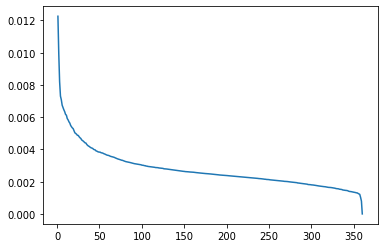

In [25]:
variance = pca_elbow.explained_variance_ratio_
number_of_components = np.arange(1, variance.shape[0]+1)
plt.plot(number_of_components, variance)

In [26]:
# Gets the number of components that explain 90% of the variance
def get_number_of_components_by_variance(variance_percentages, target_variance=0.9):
    i = 0
    acc = 0
    while acc < target_variance:
        acc += variance_percentages[i]
        i += 1
    return i

n_components = get_number_of_components_by_variance(pca_elbow.explained_variance_ratio_)
print(f'Number of PCA components to be used: {n_components}')

Number of PCA components to be used: 295


### Training

In [27]:
pca_n_components = n_components
kmeans_n_clusters = 2
training = pd.DataFrame()
testing = pd.DataFrame()

In [28]:
# Pipeline
x, y, patients = get_dataset()
p1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=pca_n_components, random_state=random_state)),
    ('kmeans', KMeans(n_clusters=kmeans_n_clusters, random_state=random_state))
])
p1

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=295, random_state=0)),
                ('kmeans', KMeans(n_clusters=2, random_state=0))])

In [29]:
train_results, test_results = execute_pipeline(p1, metrics, x, y, patients)
train_results

,metrics,1-Fold,2-Fold,3-Fold,4-Fold,5-Fold
0,Accuracy,0.217842,0.579196,0.688836,0.821229,0.632979
1,F1,0.030848,0.011111,0.661499,0.475410,0.000000
2,Homogeneity,0.347519,0.002990,0.104686,0.209511,0.001840


In [48]:
temp_train = train_results.T
temp_train.columns = train_results['metrics'].values
temp_train = temp_train.iloc[1:, :]
temp_train

,Accuracy,F1,Homogeneity
1-Fold,0.217842,0.030848,0.347519
2-Fold,0.579196,0.011111,0.00299
3-Fold,0.688836,0.661499,0.104686
4-Fold,0.821229,0.47541,0.209511
5-Fold,0.632979,0.0,0.00184


In [49]:
temp_train.describe()

,Accuracy,F1,Homogeneity
count,5.000000,5.000000,5.000000
unique,5.000000,5.000000,5.000000
top,0.217842,0.030848,0.347519
freq,1.000000,1.000000,1.000000


In [ ]:
test_results

,metrics,1-Fold,2-Fold,3-Fold,4-Fold,5-Fold
0,Accuracy,0.242424,0.771739,0.531915,0.426752,0.561151
1,F1,0.074074,0.000000,0.312500,0.250000,0.000000
2,Homogeneity,0.044015,0.009997,0.104919,0.064395,0.000000


### Ablation

#### Removing Scaler

In [ ]:
p1_without_scaler = Pipeline([
    ('pca', PCA(n_components=pca_n_components, random_state=random_state)),
    ('kmeans', KMeans(n_clusters=kmeans_n_clusters, random_state=random_state))
])

In [ ]:
train_results, test_results = execute_pipeline(p1_without_scaler, metrics, x, y, patients)
train_results

,metrics,1-Fold,2-Fold,3-Fold,4-Fold,5-Fold
0,Accuracy,0.742739,0.735225,0.700713,0.195531,0.805851
1,F1,0.607595,0.594203,0.562500,0.242105,0.681223
2,Homogeneity,0.160435,0.166395,0.123466,0.162543,0.252490


In [ ]:
test_results

,metrics,1-Fold,2-Fold,3-Fold,4-Fold,5-Fold
0,Accuracy,0.939394,0.804348,0.968085,0.350318,0.625899
1,F1,0.000000,0.526316,0.842105,0.509615,0.518519
2,Homogeneity,0.000000,0.137722,0.616428,0.198550,0.037242


#### Removing PCA

In [ ]:
p1_without_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=kmeans_n_clusters, random_state=random_state))
])

In [ ]:
train_results, test_results = execute_pipeline(p1_without_pca, metrics, x, y, patients)
train_results

,metrics,1-Fold,2-Fold,3-Fold,4-Fold,5-Fold
0,Accuracy,0.408714,0.600473,0.558195,0.256983,0.638298
1,F1,0.579025,0.679317,0.010638,0.408889,0.014493
2,Homogeneity,0.001605,0.163490,0.002811,0.006593,0.004103


In [ ]:
test_results

,metrics,1-Fold,2-Fold,3-Fold,4-Fold,5-Fold
0,Accuracy,0.060606,0.250000,0.861702,0.662420,0.561151
1,F1,0.114286,0.342857,0.000000,0.796935,0.000000
2,Homogeneity,0.000000,0.000697,0.007421,0.004051,0.000000


#### Removing Scaler and PCA

In [ ]:
p1_without_scaler_and_pca = Pipeline([
    ('kmeans', KMeans(n_clusters=kmeans_n_clusters, random_state=random_state))
])

In [ ]:
train_results, test_results = execute_pipeline(p1_without_scaler_and_pca, metrics, x, y, patients)
train_results

,metrics,1-Fold,2-Fold,3-Fold,4-Fold,5-Fold
0,Accuracy,0.742739,0.735225,0.700713,0.195531,0.805851
1,F1,0.607595,0.594203,0.562500,0.242105,0.681223
2,Homogeneity,0.160435,0.166395,0.123466,0.162543,0.252490


In [ ]:
test_results

,metrics,1-Fold,2-Fold,3-Fold,4-Fold,5-Fold
0,Accuracy,0.939394,0.804348,0.968085,0.350318,0.625899
1,F1,0.000000,0.526316,0.842105,0.509615,0.518519
2,Homogeneity,0.000000,0.137722,0.616428,0.198550,0.037242


### Experiment 2: No cross-validation

In [75]:
x, y, patients = get_dataset()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size_percentage, random_state=random_state)

In [76]:
# K=2
p1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=pca_n_components, random_state=random_state)),
    ('kmeans', KMeans(n_clusters=kmeans_n_clusters, random_state=random_state))
])
p1

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=295, random_state=0)),
                ('kmeans', KMeans(n_clusters=2, random_state=0))])

In [77]:
# Training
p1.fit(x_train)
y_pred_train = p1.predict(x_train)

print("Training")
print(f'Homogeneity Score: {homogeneity_score(y_train, y_pred_train)}')

Training
Homogeneity Score: 0.3636621683766282


In [78]:
# Test
y_pred_test = p1.predict(x_test)


print("Test")
print(f'Homogeneity Score: {homogeneity_score(y_test, y_pred_test)}')

Test
Homogeneity Score: 0.2739942291668487


In [79]:
# k=5
p2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=pca_n_components, random_state=random_state)),
    ('kmeans', KMeans(n_clusters=5, random_state=random_state))
])
p2

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=295, random_state=0)),
                ('kmeans', KMeans(n_clusters=5, random_state=0))])

In [80]:
# Training
p2.fit(x_train)
y_pred_train = p2.predict(x_train)

print("Training")
print(f'Homogeneity Score: {homogeneity_score(y_train, y_pred_train)}')

Training
Homogeneity Score: 0.5173935488517155


In [81]:
# Test
y_pred_test = p1.predict(x_test)


print("Test")
print(f'Homogeneity Score: {homogeneity_score(y_test, y_pred_test)}')

Test
Homogeneity Score: 0.2739942291668487
